<a href="https://colab.research.google.com/github/TaraRasti/Deep_Learning_F20_Assignments/blob/master/Assignment2/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import os
from six.moves import cPickle as pickle
import platform
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,32,32,3)
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(ROOT):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, '/content/drive/My Drive/cifar-10-batches-py/data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
 
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    cifar10_dir = '/content/drive/My Drive/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    x_train = X_train.astype('float32')
    x_val = X_val.astype('float32')
    x_test = X_test.astype('float32')
    x_train /= 255
    x_val /= 255
    x_test /= 255
    return x_train, y_train, x_val, y_val, x_test, y_test
 

x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()
 
print('Train data shape: ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [4]:
model = Sequential([
                    Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')

])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [6]:
sgd = optimizers.SGD(lr = 0.001, momentum= 0.9)
model.compile(optimizer= sgd,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [7]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_val,y_val),callbacks = [early_stop])

Epoch 1/100
1532/1532 [==============================] - 5s 3ms/step - loss: 2.1402 - accuracy: 0.2108 - val_loss: 1.9070 - val_accuracy: 0.3350
Epoch 2/100
1532/1532 [==============================] - 4s 3ms/step - loss: 1.8538 - accuracy: 0.3262 - val_loss: 1.6570 - val_accuracy: 0.4200
Epoch 3/100
1532/1532 [==============================] - 5s 3ms/step - loss: 1.7159 - accuracy: 0.3762 - val_loss: 1.5683 - val_accuracy: 0.4540
Epoch 4/100
1532/1532 [==============================] - 5s 3ms/step - loss: 1.6319 - accuracy: 0.4077 - val_loss: 1.4995 - val_accuracy: 0.4600
Epoch 5/100
1532/1532 [==============================] - 5s 3ms/step - loss: 1.5725 - accuracy: 0.4304 - val_loss: 1.4432 - val_accuracy: 0.4810
Epoch 6/100
1532/1532 [==============================] - 4s 3ms/step - loss: 1.5237 - accuracy: 0.4506 - val_loss: 1.3944 - val_accuracy: 0.5010
Epoch 7/100
1532/1532 [==============================] - 4s 3ms/step - loss: 1.4809 - accuracy: 0.4658 - val_loss: 1.3559 - val_ac

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1306 - accuracy: 0.6505


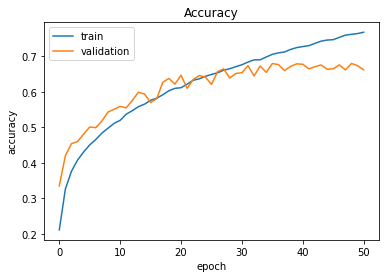

In [9]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
model = Sequential()

model.add( Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), activation='relu', kernel_regularizer= regularizers.l2(1e-4)) )
model.add( Conv2D(32, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add( Conv2D(64, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add( Conv2D(64, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add( Conv2D(128, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add( Conv2D(128, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add( Conv2D(256, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add( Conv2D(256, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [13]:
model.compile(optimizer= 'nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs = 100,validation_data = (x_val,y_val),callbacks = [early_stop])

Epoch 1/100
1532/1532 [==============================] - 10s 7ms/step - loss: 1.9324 - accuracy: 0.2801 - val_loss: 1.6798 - val_accuracy: 0.4000
Epoch 2/100
1532/1532 [==============================] - 10s 7ms/step - loss: 1.5295 - accuracy: 0.4486 - val_loss: 1.4843 - val_accuracy: 0.4770
Epoch 3/100
1532/1532 [==============================] - 10s 7ms/step - loss: 1.3777 - accuracy: 0.5119 - val_loss: 1.6452 - val_accuracy: 0.4560
Epoch 4/100
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2762 - accuracy: 0.5531 - val_loss: 1.2894 - val_accuracy: 0.5570
Epoch 5/100
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2052 - accuracy: 0.5841 - val_loss: 1.2462 - val_accuracy: 0.5570
Epoch 6/100
1532/1532 [==============================] - 10s 7ms/step - loss: 1.1523 - accuracy: 0.6068 - val_loss: 1.1732 - val_accuracy: 0.5950
Epoch 7/100
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1121 - accuracy: 0.6248 - val_loss: 1.1636 -

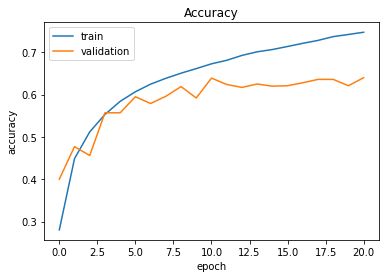

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
model = Sequential()

model.add( Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), activation='relu', kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add( Conv2D(32, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add( Conv2D(64, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add( Conv2D(64, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add( Conv2D(128, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add( Conv2D(128, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add( Conv2D(256, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add( Conv2D(256, (3, 3), padding='same', activation='relu',  kernel_regularizer= regularizers.l2(1e-4)) )
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)       

In [18]:
model.compile(optimizer= 'nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs = 100,validation_data = (x_val,y_val), callbacks=[early_stop])

Epoch 1/100
1532/1532 [==============================] - 14s 9ms/step - loss: 2.2395 - accuracy: 0.3513 - val_loss: 2.2084 - val_accuracy: 0.3260
Epoch 2/100
1532/1532 [==============================] - 14s 9ms/step - loss: 1.6938 - accuracy: 0.4787 - val_loss: 8.6476 - val_accuracy: 0.3410
Epoch 3/100
1532/1532 [==============================] - 14s 9ms/step - loss: 1.5201 - accuracy: 0.5377 - val_loss: 1.9609 - val_accuracy: 0.4570
Epoch 4/100
1532/1532 [==============================] - 14s 9ms/step - loss: 1.4378 - accuracy: 0.5739 - val_loss: 1.3811 - val_accuracy: 0.6050
Epoch 5/100
1532/1532 [==============================] - 14s 9ms/step - loss: 1.3705 - accuracy: 0.6019 - val_loss: 1.3860 - val_accuracy: 0.5860
Epoch 6/100
1532/1532 [==============================] - 14s 9ms/step - loss: 1.3218 - accuracy: 0.6238 - val_loss: 1.4232 - val_accuracy: 0.5900
Epoch 7/100
1532/1532 [==============================] - 14s 9ms/step - loss: 1.2726 - accuracy: 0.6446 - val_loss: 1.4395 -

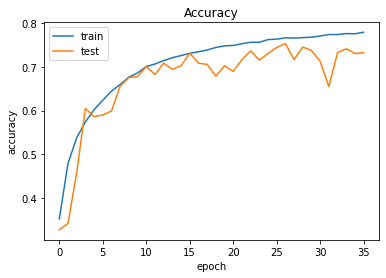

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

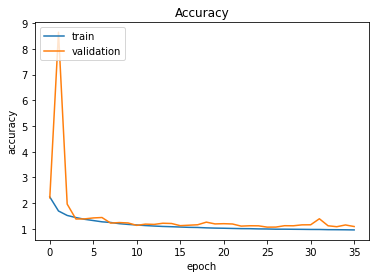

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()